<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/quality_of_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are testing the quality of greek journalism .
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata
</font>

In [ ]:
# coding: utf-8
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata
import sys
sys.path.insert(1, '/Users/elenikaranikola/Desktop/NewsCleanser')
from settings import pie_colors

<br>
<font size="3">     
First of all we will find the average number of different words the articles have. If an article has more words than the average it will be considered an article of good quality.
<br>
In the next block we define two functions:
    
- **plot_pie(x,y):** gets two numbers as input and produces a persentage pie.
- **find_average(x):** gets as input all the articles and calculates the average number of different words each article has.
- **print_pies(x):** gets as input a list of different categories and plots the pie charts for each one of them.
</font>
<br>

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#get the article body
articles = list(df['article_body'])

#function that calculates the average number of unique words the give articles have
def find_average(articles):

    sum_len = 0
    for words in articles:
        #split the articles to words
        word_list = words.split()
        #find the different words
        unique = set(word_list)
        #get its length
        article_len = len(unique)
        #add to sum
        sum_len += article_len
    
    total_articles = len(df.index) + 1 
    
    return (sum_len/total_articles)


#function to plot in a pie two sizes
def plot_pie(ab, be, topic):
    my_color = pie_colors.pop(0)
    # edit your labels
    labels = 'Good Quality', 'Bad Quality'
    sizes = [ab, be]
    explode = (0, 0)
    fig1, ax1 = plt.subplots(figsize=(30,10))
    ax1.pie(sizes, explode=explode, labels=labels, colors = my_color, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 18})
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Percentage for Category '+ topic , fontsize=30)
    plt.show()

#variable that will contain the average number of unique words
average = find_average(articles)



def print_pies(categories):
    #loop over the different categories and plot each diagram
    for category in categories:
        #group all articles by their topic
        culture_articles = df.groupby(['topic']).get_group(category)['article_body']
        above = 0
        bellow = 0
        #for each category count the articles that are above and bellow the average length
        for article in culture_articles:
            word_list =article.split()
            if average < len(set(word_list)):
                above += 1
            else:
                bellow +=1
            
            
        plot_pie(above, bellow, category)
        print('')
        print('')

<br>
<font size="3">     
In the block bellow we find the different categories and call the function to plot the by pie chart for each one of them.
</font>
<br>

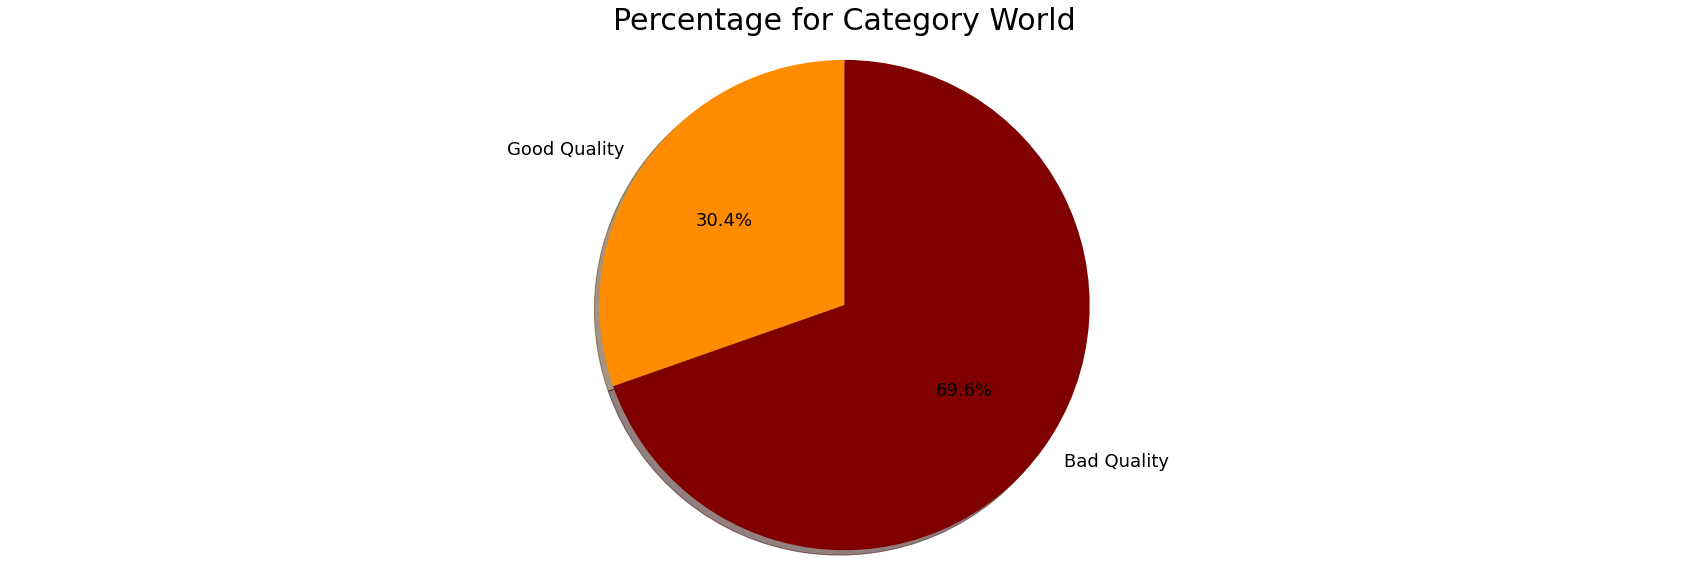

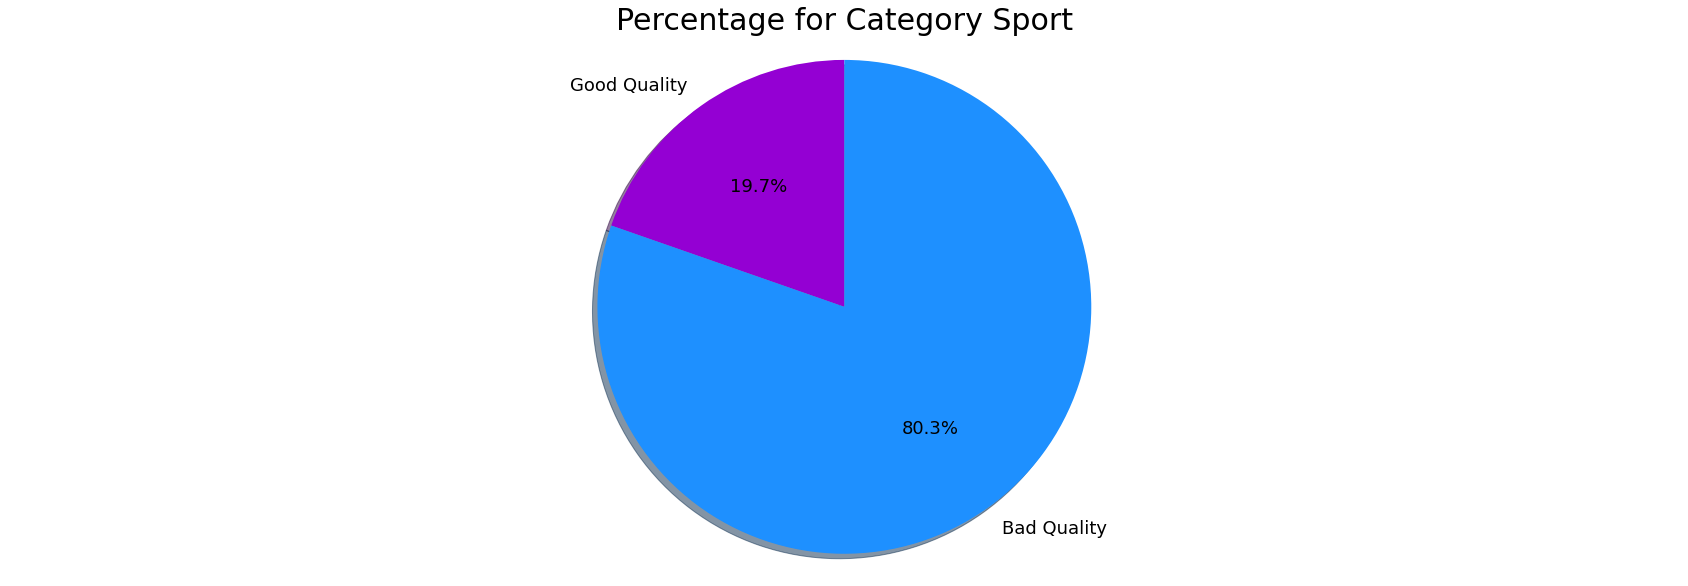

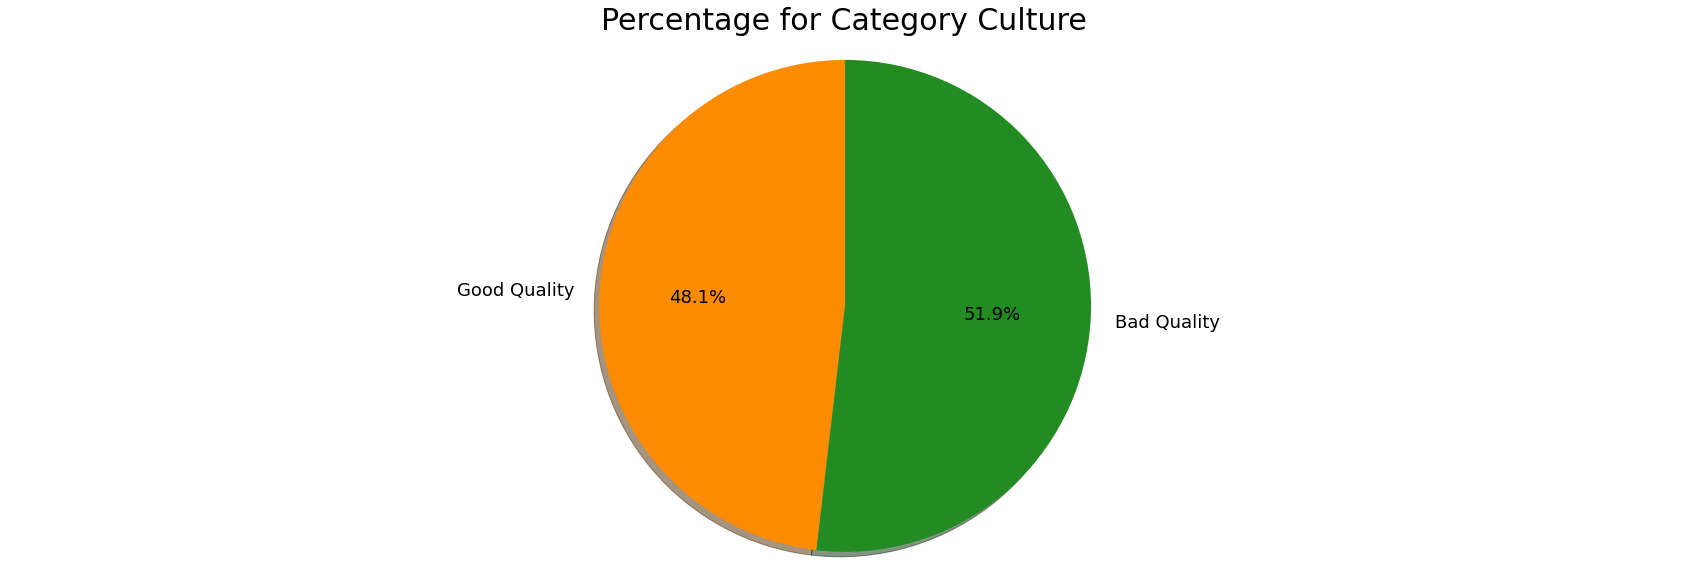

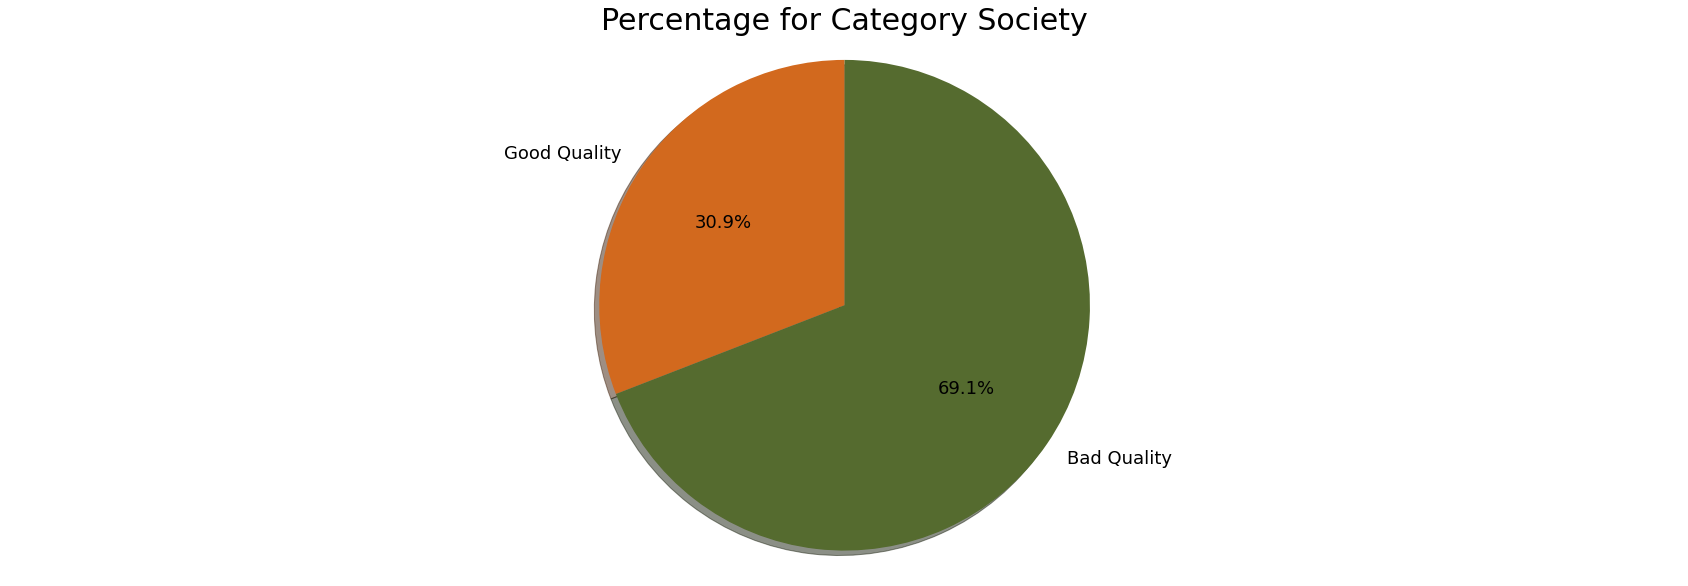

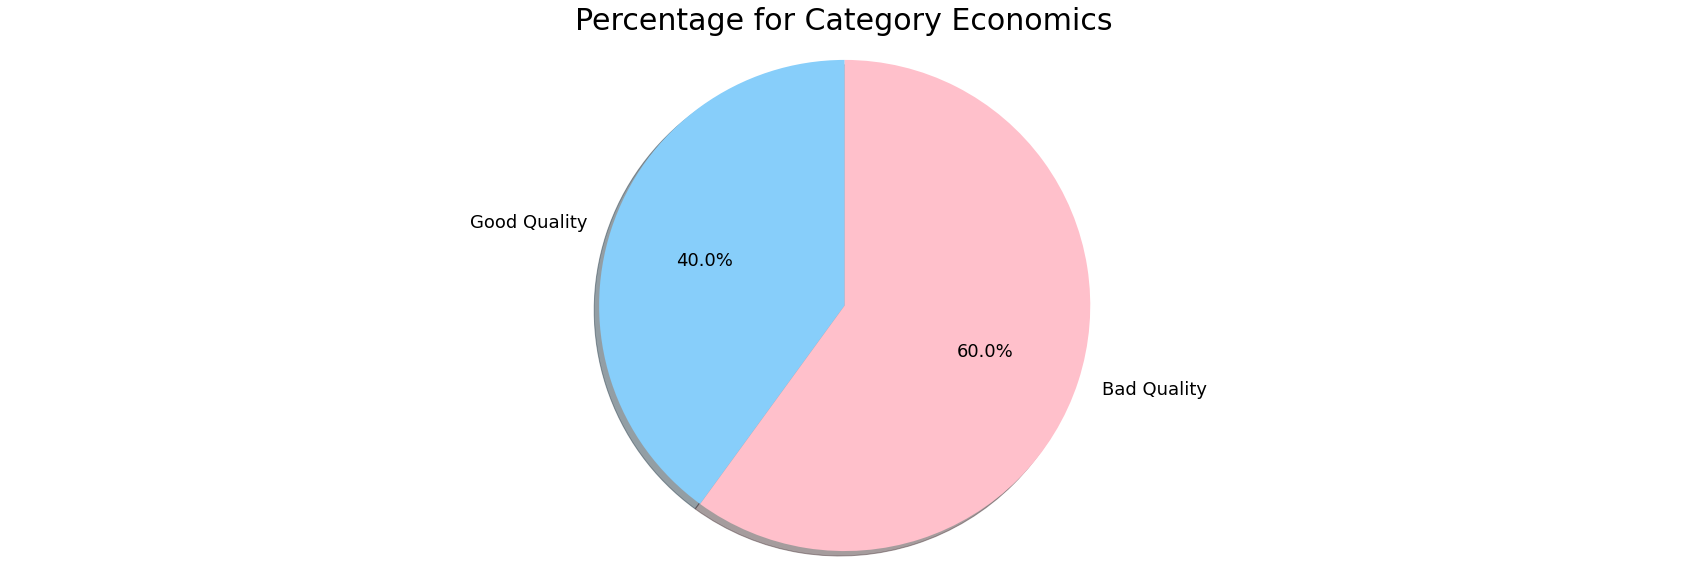

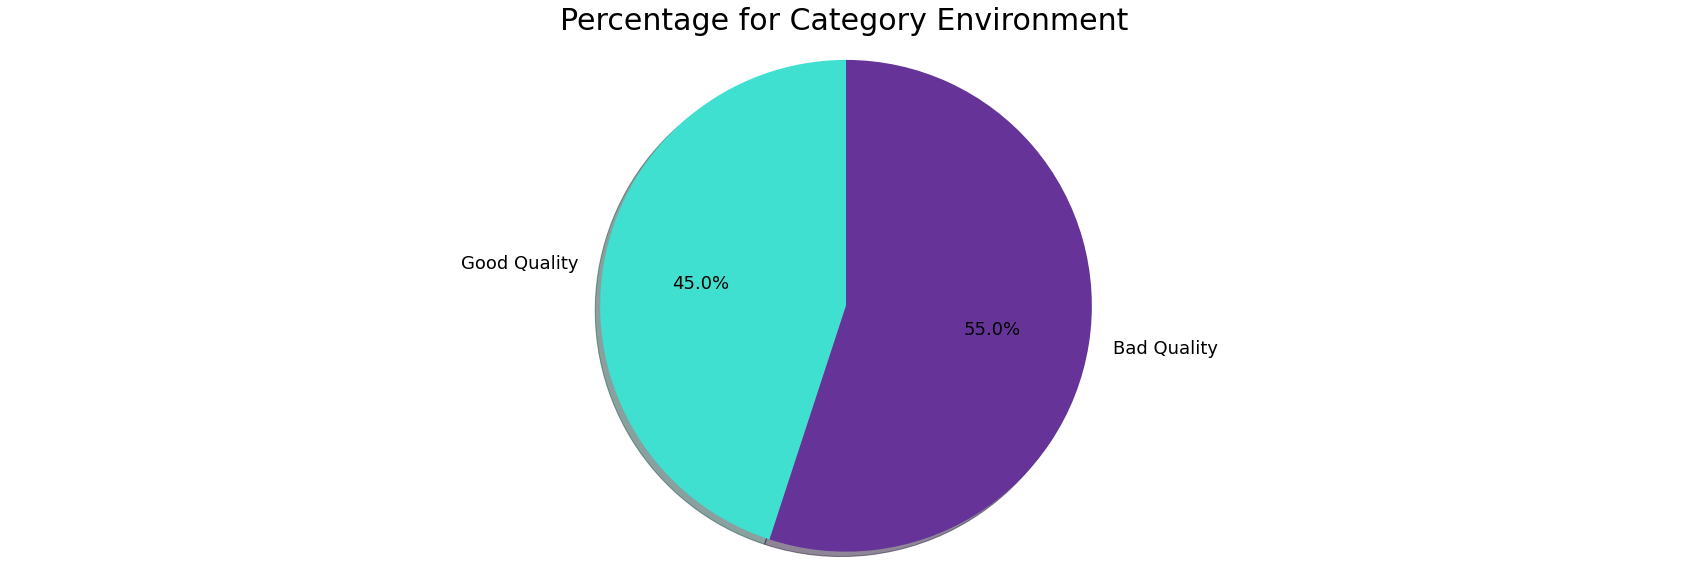

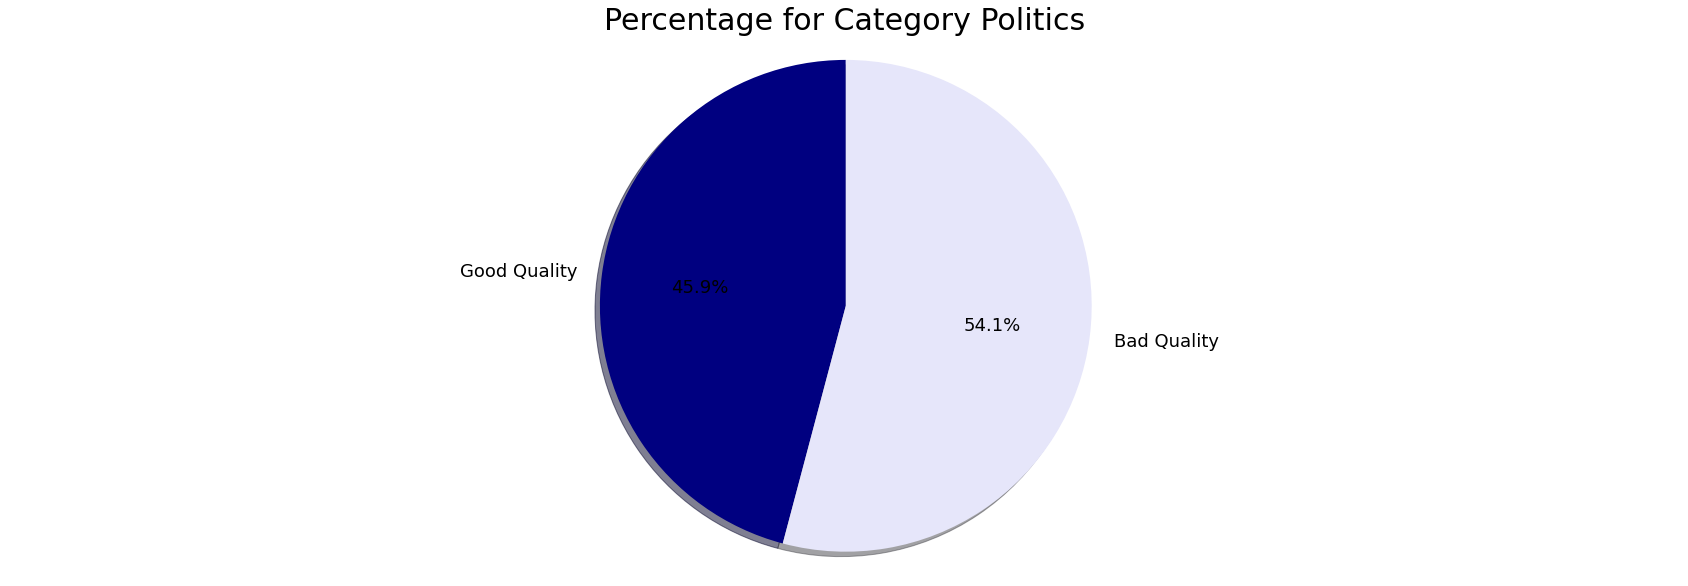

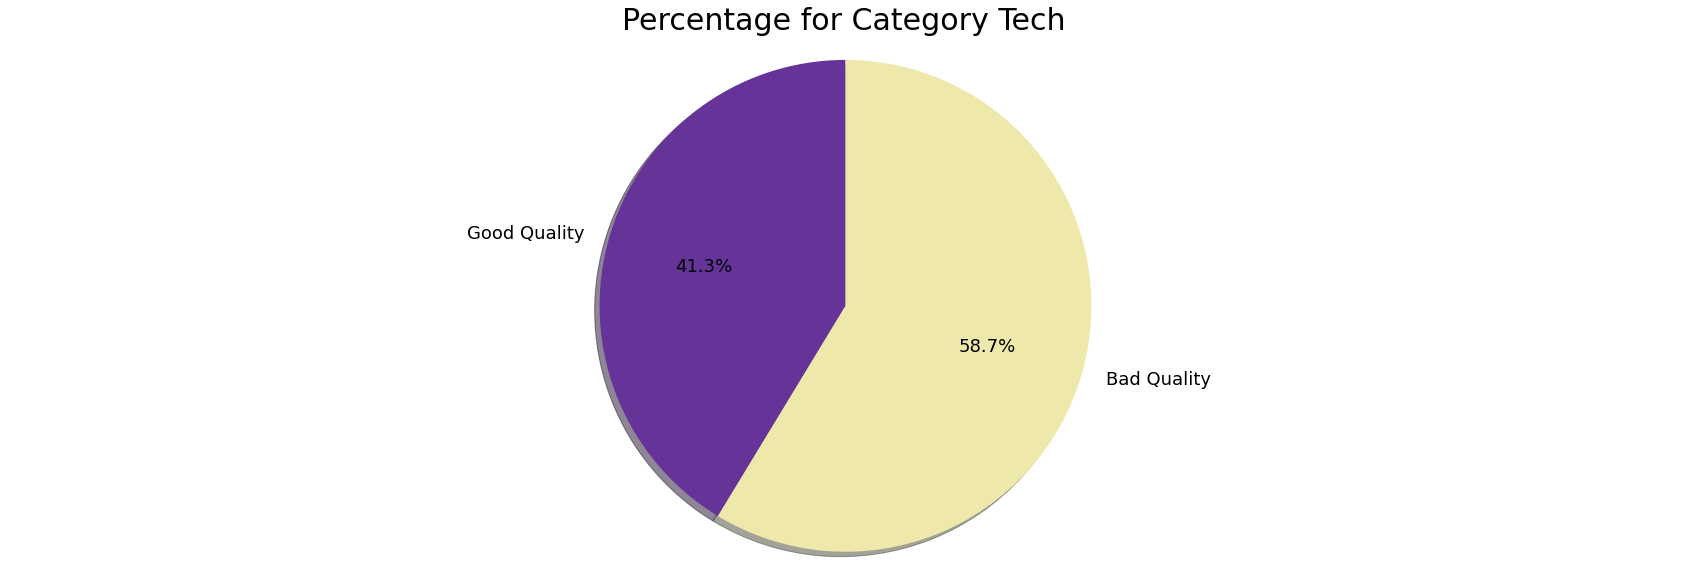

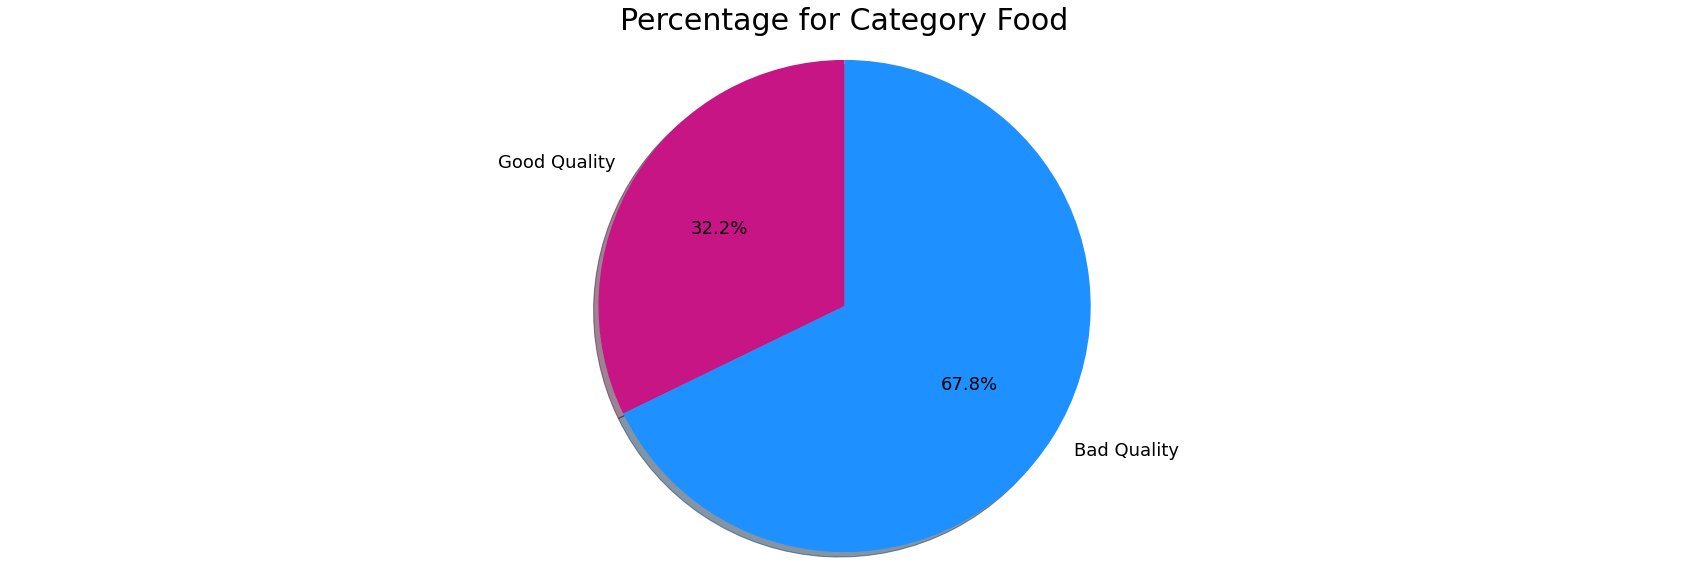

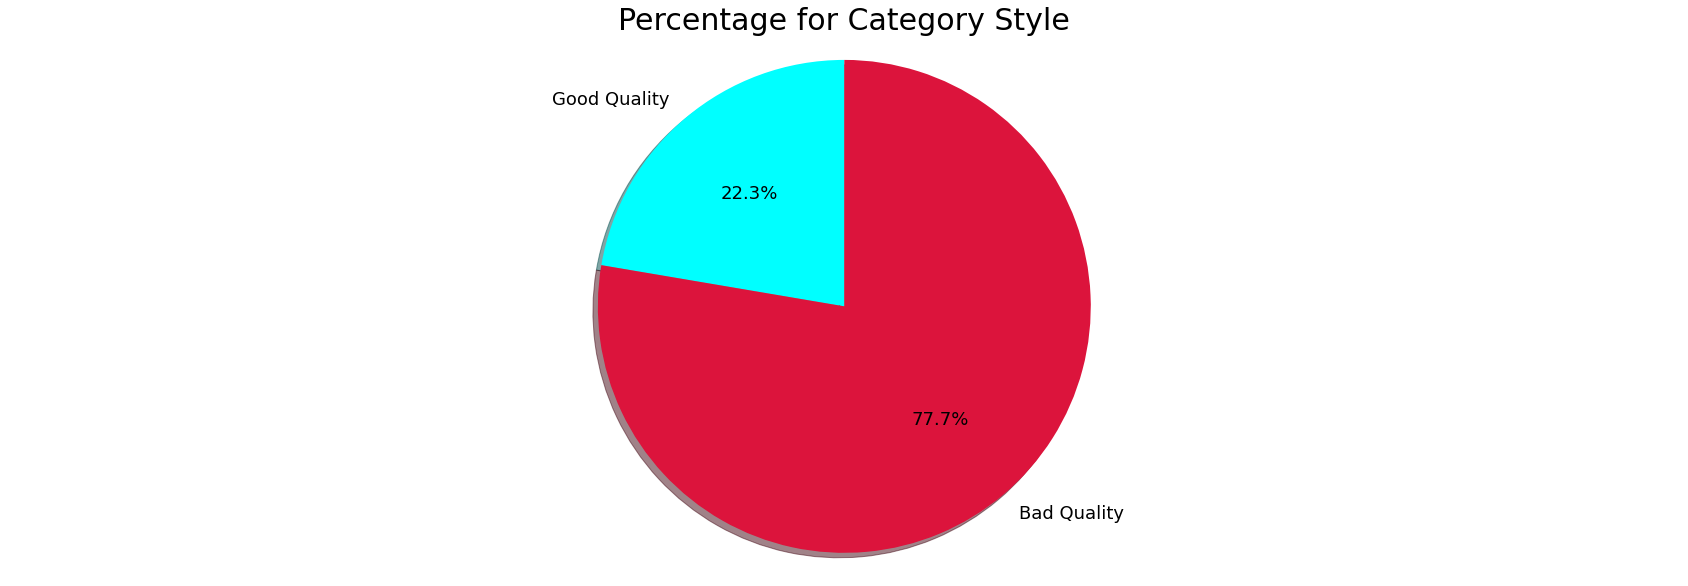

In [ ]:
#List unique values in the df['topic'] column
categories = df.topic.unique()

#print a pie chart for each category
print_pies(categories)